<a href="https://colab.research.google.com/github/vieirajclaudio/Data_Science_1/blob/main/C%C3%B3pia_de_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Vancouver*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Vancouver no Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/bc/vancouver/2022-09-10/visualisations/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28201,-123.12669,Entire home/apt,100,30,437,2022-07-05,2.94,1,35,7,18-611603
1,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,94,2022-09-01,0.68,1,204,4,NaN
2,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.23,1,0,0,21-156500
3,14424,Spacious one-bedroom in sought-after Strathcona,56709,Samantha Jo,NaN,Downtown Eastside,49.27921,-123.08835,Entire home/apt,166,30,261,2022-08-16,1.71,3,185,3,19-162091
4,16254,Close to PNE/Hastings Park Garden level suite,63238,Jason,NaN,Hastings-Sunrise,49.27721,-123.04086,Entire home/apt,350,3,7,2022-07-30,0.14,1,10,2,19-162421


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
df.shape

(5572, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5572 non-null   int64  
 1   name                            5572 non-null   object 
 2   host_id                         5572 non-null   int64  
 3   host_name                       5572 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   5572 non-null   object 
 6   latitude                        5572 non-null   float64
 7   longitude                       5572 non-null   float64
 8   room_type                       5572 non-null   object 
 9   price                           5572 non-null   int64  
 10  minimum_nights                  5572 non-null   int64  
 11  number_of_reviews               5572 non-null   int64  
 12  last_review                     47

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* A coluna neighbourhood_group demostra que tem 100% dos valores ausentes
* A coluna license tem 30% dos valores ausentes
* As colunas reviews_per_month e last_review, tem 15% de valores ausentes

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.313711
reviews_per_month                 0.145729
last_review                       0.145729
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

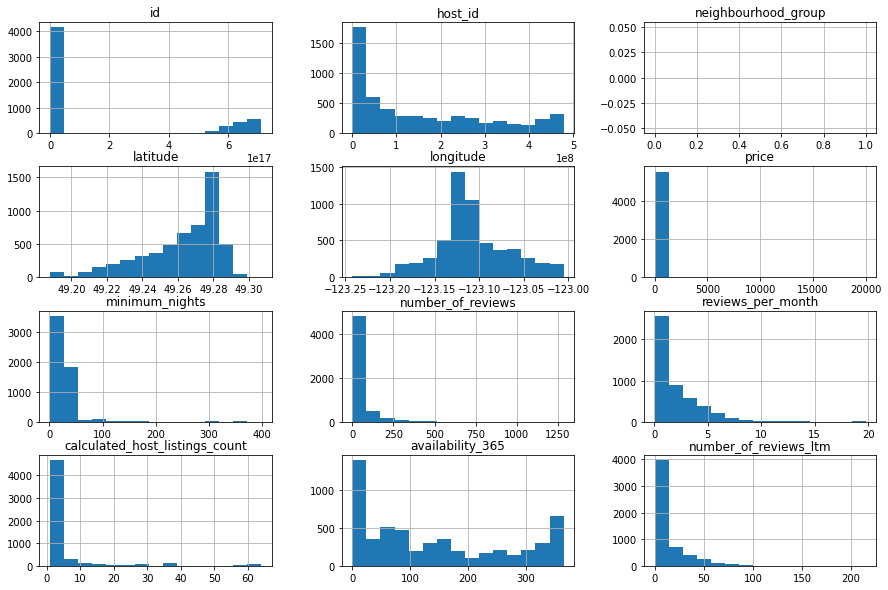

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

* No gráfico mostra outliers em Price.

In [ ]:
df[['price']].describe()

,price
count,5572.000000
mean,233.403266
std,450.007706
min,0.000000
25%,115.750000
50%,170.000000
75%,262.000000
max,20000.000000


* Vamos limpar a outliers price do Dataframe.

In [ ]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)

In [ ]:
# vamos retirar a coluna neighbourhood_group, pois não tem nenhum dado
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

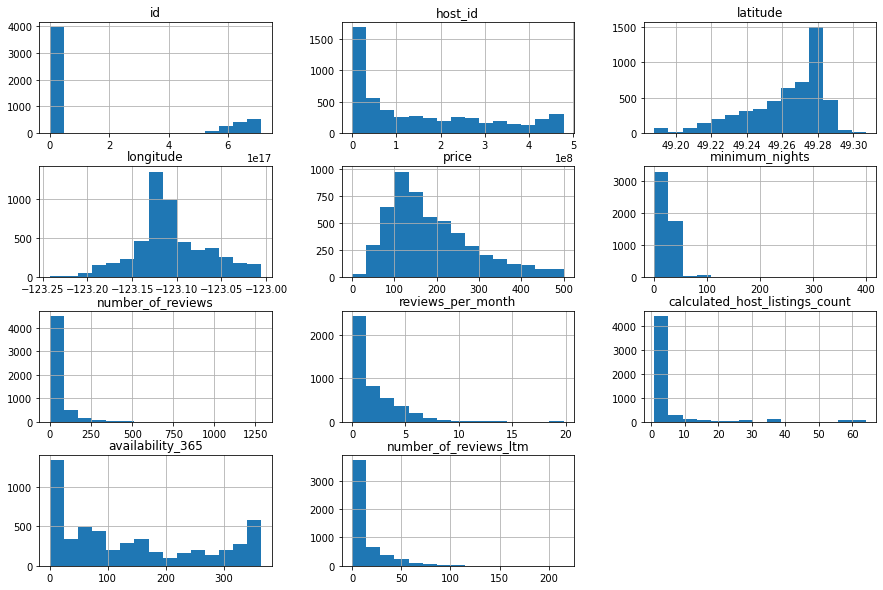

In [ ]:
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df.price.mean()

233.4032663316583

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação

# mostrar a matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.149464,-0.027491,0.178971,-0.025856,0.095635
minimum_nights,-0.149464,1.000000,-0.141333,-0.286041,0.099970,0.119703
number_of_reviews,-0.027491,-0.141333,1.000000,0.413028,-0.140906,-0.036853
reviews_per_month,0.178971,-0.286041,0.413028,1.000000,-0.131873,0.087518
calculated_host_listings_count,-0.025856,0.099970,-0.140906,-0.131873,1.000000,0.096175
availability_365,0.095635,0.119703,-0.036853,0.087518,0.096175,1.000000


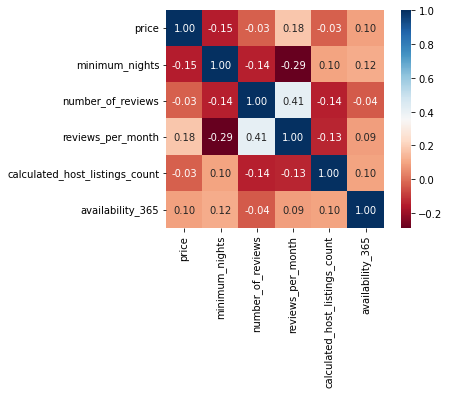

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4263
Private room        975
Shared room          21
Hotel room            6
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.809687
Private room       0.185185
Shared room        0.003989
Hotel room         0.001140
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara em Vancouver?**



In [ ]:
# ver preços por bairros
df_clean.price.max()



500

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Downtown              226.394523
Kitsilano             209.166667
Downtown Eastside     206.053030
West Point Grey       202.048193
Arbutus Ridge         194.900000
Strathcona            191.727273
West End              190.968370
Mount Pleasant        187.849359
Dunbar Southlands     176.632479
Grandview-Woodland    175.354978
Name: price, dtype: float64

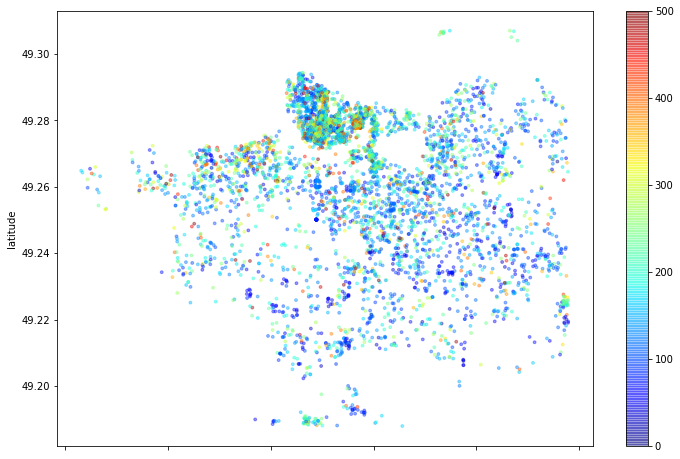

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.median()

3.0

## Conclusões


* A partir dos dados apresentados, concluímos que os aluguéis de imóveis em Vancouver são mais altos no centro da cidade, e diminuem gradualmente ao se afastar do centro. Strathcona, West End, Mount Pleasant, Dunbar Southlands e Grandview-Woodland são as áreas com os mais baixos aluguéis.
*Texto do ChatGPT